In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df=pd.read_csv('CRUDEPETROLEUMOIL.csv')

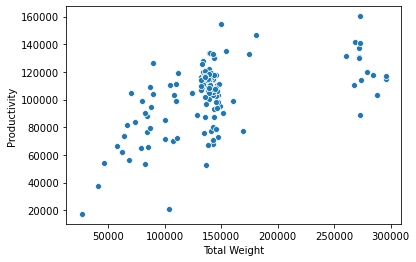

In [6]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [7]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.000000,134.000000,117.000000
mean,6467.619403,194319.350746,33.220672,53.053657,141637.058545,1.416119,0.141612,0.0,0.811716,13.299403,101998.610075,176352.944932
std,1732.158703,3800.499877,13.998062,37.780989,55984.269253,0.559747,0.055975,0.0,2.887590,29.120806,24596.479889,68081.967236
min,5053.000000,190899.000000,0.000000,0.000000,26483.500000,0.260000,0.026000,0.0,0.000000,0.000000,17366.230000,49772.000000
25%,5086.250000,191605.500000,26.850000,32.097500,115034.995250,1.150000,0.115000,0.0,0.000000,0.000000,88354.027500,142376.000000
50%,5119.500000,192568.000000,29.900000,42.300000,138937.339000,1.390000,0.139000,0.0,0.000000,0.300000,106843.305000,149519.000000
75%,8626.750000,200098.500000,36.900000,55.350000,145715.273250,1.460000,0.146000,0.0,0.000000,12.975000,116593.622500,239124.000000
max,8660.000000,200921.000000,119.500000,246.350000,295923.185000,2.960000,0.296000,0.0,21.800000,195.500000,160295.140000,302403.000000


In [33]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [34]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
print(lm.intercept_)

67523.35716896028


In [36]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.22768


In [37]:
predictions = lm.predict(X_test)

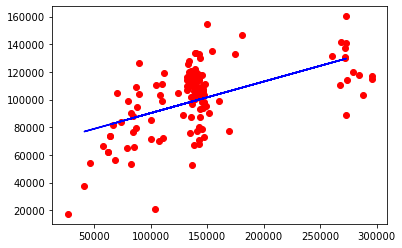

In [38]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 15523.252721038238
MSE: 356414381.886102
RMSE: 18878.940168507925
r2_score: 0.3047916697311501


In [40]:
joblib.dump(lm,"Crude_Petroleum_oil.pkl")#only execute if rmse is less than half of mean of productivity

['Crude_Petroleum_oil.pkl']